In [5]:
a =1
b =2
c =1
d =1
n =10

10

using Plots -> 49.024834 seconds (16.55 M allocations: 945.356 MiB, 1.24% gc time)

plot(sin) ->

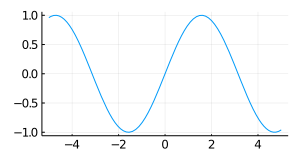

  8.055553 seconds (15.51 M allocations: 792.346 MiB, 3.23% gc time)

using PyPlot -> 19.415546 seconds (9.84 M allocations: 494.717 MiB, 1.21% gc time)

using DifferentialEquations ->

In [ ]:
import Pkg
Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("DifferentialEquations")
Pkg.add("Combinatorics")
Pkg.add("Distributed")
Pkg.add("Distributions")
Pkg.add("Libdl")
Pkg.add("LinearAlgebra")
Pkg.add("Optim")
Pkg.add("Primes")
Pkg.add("ProgressMeter")
Pkg.add("RCall")
Pkg.add("SpecialFunctions")
Pkg.add("Statistics")
Pkg.add("SymPy")

print("using Plots ->")
@time using Plots
gr(legend=false); ENV["PLOTS_TEST"] = "true"

print("\nplot(sin) ->")
@time plot(sin, size=(300, 160)) |> display # コンパイル

print("\nusing PyPlot ->")
@time using PyPlot: PyPlot, plt

print("\nusing DifferentialEquations ->")
@time using DifferentialEquations

using Base64
using Combinatorics
using Distributed
using Distributions
using Libdl
using LinearAlgebra
using Optim
using Primes
using ProgressMeter
using Random: seed!
using RCall
using SpecialFunctions
using Statistics
using SymPy: SymPy, sympy, Sym, @vars, @syms, simplify, oo, PI

ldisp(x...) = display("text/html", raw"$$" * prod(x) * raw"$$")

showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end

In [ ]:
Pkg.add("StatsBase")
using StatsBase

function nrationalpoints_naive(f, p)
    @distributed (+) for x in 0:p-1
        s = 0
        for y in 0:p-1
            s += ifelse(mod(f(x,y),p) == 0, 1, 0)
        end
        s
    end
end

function plot_SatoTate_naive(f; figtitle="Sato-Tate conjecture", N=2^12)
    P = primes(N)
    @show N, length(P)
    @time S = nrationalpoints_naive.(f, P) .+ 1 # "+1" は無限遠点の個数
    plot_SatoTate(P, S; figtitle=figtitle)
end

function nrationalpoints_legendre(g, p)
    @distributed (+) for x in 0:p-1
        l = legendresymbol(mod(g(x),p), p)
        ifelse(l == 1, 2, ifelse(l == -1, 0, 1))
    end
end

function plot_SatoTate_legendre(f; figtitle="Sato-Tate conjecture", N=2^12)
    P = primes(N)
    @show N, length(P)
    @time S = nrationalpoints_legendre.(f, P) .+ 1 # "+1" は無限遠点の個数
    plot_SatoTate(P, S; figtitle=figtitle)
end

function plot_SatoTate(P, S; figtitle="Sato-Tate conjecture")
    a = (P .+ 1) - S

    @show count(abs.(a) .> 2sqrt.(P)) # Weil予想の確認
    X = a ./ (2sqrt.(P)) # -1 から 1 の区間に入るように正規化
    θ = acos.(X)

    x = range(-1, 1, length=200)
    g(x) = (2/π)*sqrt(1-x^2) # 半円則

    t = range(0, π, length=200)
    h(t) = (2/π)*sin(t)^2 # sin^2 分布

    sleep(0.1)
    plt.figure(figsize=(8,3))
    
    plt.subplot(121)
    plt.hist(X, normed=true, bins=21, alpha=0.5, label="\$a_p/(2\\sqrt{p})\$")
    plt.plot(x, g.(x), color="red", ls="--", label="\$y=(2/\\pi)\\sqrt{1-x^2}\$")
    plt.xlabel("\$x\$")
    plt.grid(ls=":")
    plt.legend(fontsize=9)
    plt.title(figtitle, fontsize=10)
    
    plt.subplot(122)
    plt.hist(θ, normed=true, bins=21, alpha=0.5, label="\$\\arccos(a_p/(2\\sqrt{p}))")
    plt.plot(t, h.(t), color="red", ls="--", label="\$y=(2/\\pi)\\sin^2\\theta\$")
    plt.xlabel("\$\\theta\$")
    plt.grid(ls=":")
    plt.legend(fontsize=8)
    plt.title(figtitle, fontsize=10)
    plt.tight_layout()
    println(fit(Histogram, 180θ/π,  0.0:10.0:180.0, closed= :right))
end

function plot_SatoTate_legendre_4(f; figtitle="Sato-Tate conjecture", N=2^12)
    P = primes(N)
    @show N, length(P)
    @time S = nrationalpoints_legendre.(f, P) .+ 1 # "+1" は無限遠点の個数
    plot_SatoTate_4(P, S; figtitle=figtitle)
end

function plot_SatoTate_4(P, S; figtitle="Sato-Tate conjecture")
    a = (P .+ 1) - S

    @show count(abs.(a) .> 4sqrt.(P)) # Weil予想の確認
    X = a ./ (4sqrt.(P)) # -1 から 1 の区間に入るように正規化
    θ = acos.(X)

    x = range(-1, 1, length=200)
    g(x) = (6/π)*sqrt(1-x^2) # 半円則

    t = range(0, π, length=200)
    h(t) = (6/π)*sin(t)^2 # sin^2 分布

    sleep(0.1)
    plt.figure(figsize=(8,3))
    
    plt.subplot(121)
    plt.hist(X, normed=true, bins=21, alpha=0.5, label="\$a_p/(2\\sqrt{p})\$")
    plt.plot(x, g.(x), color="red", ls="--", label="\$y=(2/\\pi)\\sqrt{1-x^2}\$")
    plt.xlabel("\$x\$")
    plt.grid(ls=":")
    plt.legend(fontsize=9)
    plt.title(figtitle, fontsize=10)
    
    plt.subplot(122)
    plt.hist(θ, normed=true, bins=21, alpha=0.5, label="\$\\arccos(a_p/(2\\sqrt{p}))")
    plt.plot(t, h.(t), color="red", ls="--", label="\$y=(2/\\pi)\\sin^2\\theta\$")
    plt.xlabel("\$\\theta\$")
    plt.grid(ls=":")
    plt.legend(fontsize=8)
    plt.title(figtitle, fontsize=10)

    plt.tight_layout()
end

楕円曲線 $y^2 = ax^3 + bx^2 + cx + d$ の場合の佐藤・Tate予想を数値的に確認.

Legendre記号を使った計算によって高速化し, より多数の素数における有理点の個数を求める.

In [ ]:
addedprocs = addprocs(40)
@everywhere using Combinatorics: legendresymbol
@everywhere g(x) = ax^3 + bx^2 + cx + d
N = 2^n
figtitle = "Sat-Tate conj. for  \$y^ax^3 + bx^2 + cx + d\$,  \$p < 2^{n}\$"
plot_SatoTate_legendre(g, figtitle=figtitle, N=N)
rmprocs(addedprocs);